In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Choose where to save plots generated in this notebook
path_fig = "figs/output/"

Sources:

- Wikipedia

  - `[Lor_WP]` [Lorenz sytem](https://en.wikipedia.org/wiki/Lorenz_system)
  - `[Att_WP]` [Attractor](https://en.wikipedia.org/wiki/Attractor#Strange_attractor)
  - `[Cha_WP]` [Chaos theory](https://en.wikipedia.org/wiki/Chaos_theory)

- Thought.co 

  - `[Con_TC]` [Convection and weather](https://www.thoughtco.com/what-is-convection-4041318)

## ---- Atmospheric convection ----

(See `[Con_TC]`)

In weather, convection describes the vertical transport of heat and moisture in the atmosphere.

The process of convection begins at sunrise and continues as follows:

- The sun heats the ground through radiation
- The ground heats the layer of air directly above it through conduction 
- Because some surfaces become warmer than others, like sand and rock compared to water and vegetation. The air near the surface heats unevenly.
- The warmer air becomes less dense than the cooler air that surrounds it and thus begins to rise. 



## ---- Lorenz system ----

(See `[Lor_WP]`)

**Definition**

In 1963, Edward Lorenz developed a simplified mathematical model for atmospheric convection. The model is a system of three ordinary differential equations now known as the Lorenz equations:

$$
\frac{dx}{dt} = \sigma(y-x)\\
\frac{dy}{dt} = x(\rho-z) - y\\
\frac{dz}{dt} = xy - \beta z
$$



The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above, with:

- $x$ is proportional to the rate of convection, 
- $y$ is proportionalto the horizontal temperature variation
- $z$ is proportional to the vertical temperature variation.
- The constants $\sigma$, $\rho$ , $\beta$ are system parameters proportional to the Prandtl number, Rayleigh number, and certain physical dimensions of the layer itself

**Properties**

For generic values of $\sigma$, $\rho$ , $\beta$, the Lorenz system is 

- Nonlinear
- Non-periodic
- Three-dimensional
- Deterministic

With the following constants (and nearby values) $\sigma=10, \beta=8/3, \rho=28$, the Lorenz is in addition:

- Chaotic
- Almost all initial points will tend to an invariant set – the Lorenz attractor – a strange attractor with 3 equilibra

In [2]:

# Choose constant values as defined by Lorenz
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

# Define the lorenz' system of ODE
def lorenz(state, t):  # Param t is required by odeint
    x, y, z = state    # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

t = np.arange(0.0, 40.0, 0.01) # A sequence of time points for which to solve for state

### ---- Phase space ----

Phase space plots can be used to show regions of stability.

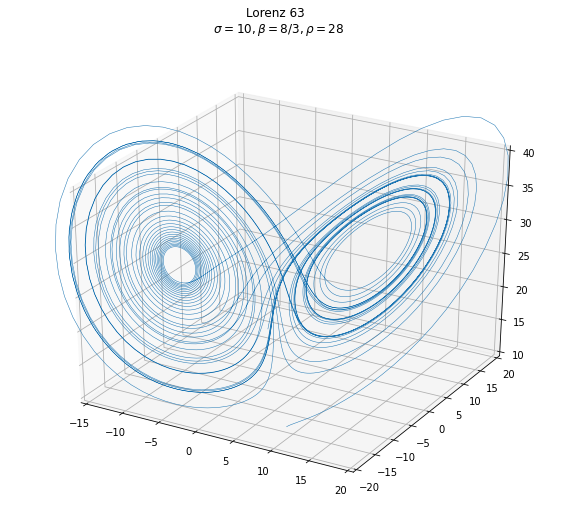

In [16]:
# Numericaly solve the lorenz system given state0 as initial contidion
state0 = [1.0, 1.0, 1.0]      
states = odeint(lorenz, state0, t)  

# Phase space: type of plots used to 
fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2], lw="0.5")
title = "Lorenz 63" + " \n $\\sigma=10, \\beta=8/3, \\rho=28$"
fig.suptitle(title)
ax.set_xlim3d(-15, 20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(10,40)

# UNCOMMENT to save the plot
# name_fig = "lorenz_63_phase_plot"
# filename_fig = path_fig + name_fig + ".png"
# plt.savefig(filename_fig)

plt.draw()
plt.show()



### ---- Strange Attractor ----

(See `[Att_WP]`)

**Definition Attractor**

An attractor is a set of numerical values toward which a system tends to evolve, for a wide variety of starting conditions of the system. System values that get close enough to the attractor values remain close even if slightly disturbed. 

**Definition Strange Attractor**

Given any two arbitrarily close alternative initial points on the attractor:

- after any of various numbers of iterations, will lead to points that are arbitrarily far apart (subject to the confines of the attractor)
- after any of various other numbers of iterations will lead to points that are arbitrarily close together. 

Thus a dynamic system with a chaotic attractor is locally unstable yet globally stable: once some sequences have entered the attractor, nearby points diverge from one another but never depart from the attractor

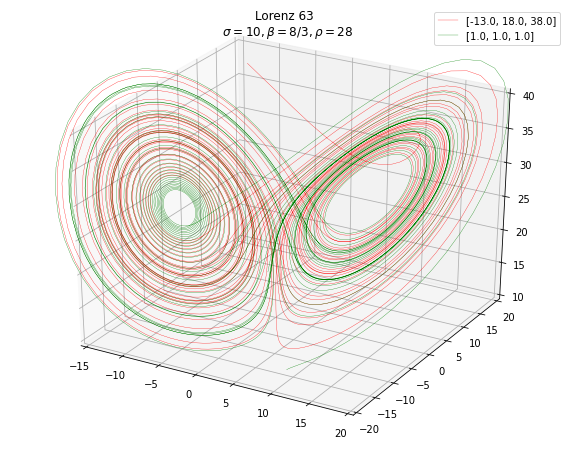

In [17]:
# Choose very different states 

state0_1 = [-13.0, 18.0, 38.0]  
state0_2 = [1.0, 1.0, 1.0]

states1 = odeint(lorenz, state0_1, t) 
states2 = odeint(lorenz, state0_2, t)

# Phase space: type of plots used to 
fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')
ax.plot(states1[:, 0], states1[:, 1], states1[:, 2], lw="0.3", c="r", label="[-13.0, 18.0, 38.0]")
ax.plot(states2[:, 0], states2[:, 1], states2[:, 2], lw="0.3", c="g", label="[1.0, 1.0, 1.0]")
ax.legend()
title = "Lorenz 63" + " \n $\\sigma=10, \\beta=8/3, \\rho=28$"
ax.set_title(title)
ax.set_xlim3d(-15, 20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(10,40)

# UNCOMMENT to save the plot
# name_fig = "lorenz_63_phase_plot_different_state0"
# filename_fig = path_fig + name_fig + ".png"
# plt.savefig(filename_fig)

plt.draw()
plt.show()



### ---- Chaotic ----

(See `[Cha_WP]`)

**Definition butterfly effect**

The butterfly effect, an underlying principle of chaos, describes how a small change in one state of a deterministic nonlinear system can result in large differences in a later state

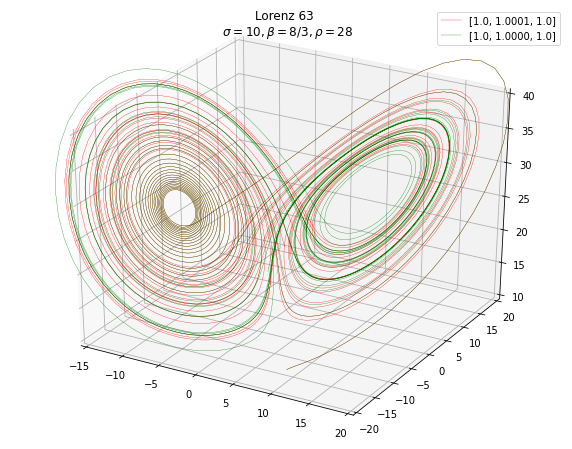

In [18]:
# Choose 2 very similar states 
state0_1 = [1.0, 1.0001, 1.0]
state0_2 = [1.0, 1.0, 1.0]            
states1 = odeint(lorenz, state0_1, t) 
states2 = odeint(lorenz, state0_2, t)

# Phase space: type of plots used to 
fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')
ax.plot(states1[:, 0], states1[:, 1], states1[:, 2], lw="0.3", c="r", label="[1.0, 1.0001, 1.0]")
ax.plot(states2[:, 0], states2[:, 1], states2[:, 2], lw="0.3", c="g", label="[1.0, 1.0000, 1.0]")
ax.legend()
title = "Lorenz 63" + " \n $\\sigma=10, \\beta=8/3, \\rho=28$"
ax.set_title(title)
ax.set_xlim3d(-15, 20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(10,40)

# UNCOMMENT to save the plot
# name_fig = "lorenz_63_phase_plot_perturbed_state0"
# filename_fig = path_fig + name_fig + ".png"
# plt.savefig(filename_fig)

plt.draw()
plt.show()



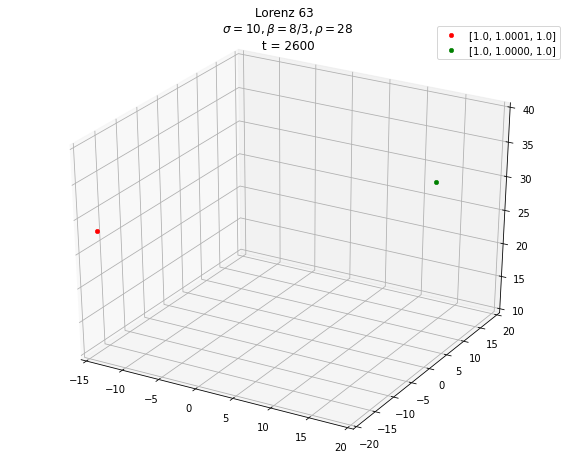

In [19]:
# Phase space: type of plots used to 
fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')
start = 2600
end = start+1
ax.scatter(
    states1[start:end, 0], states1[start:end, 1], states1[start:end, 2],
    lw="0.5", c="r", label="[1.0, 1.0001, 1.0]"
)
ax.scatter(
    states2[start:end, 0], states2[start:end, 1], states2[start:end, 2],
    lw="0.5", c="g", label="[1.0, 1.0000, 1.0]"
)
ax.set_xlim3d(-15, 20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(10,40)
ax.legend()
title = "Lorenz 63" + " \n $\\sigma=10, \\beta=8/3, \\rho=28$" + " \n t = " + str(start)
ax.set_title(title)

# UNCOMMENT to save the plot
# name_fig = "lorenz_63_phase_plot_one_instant"
# filename_fig = path_fig + name_fig + ".png"
# plt.savefig(filename_fig)

plt.show()



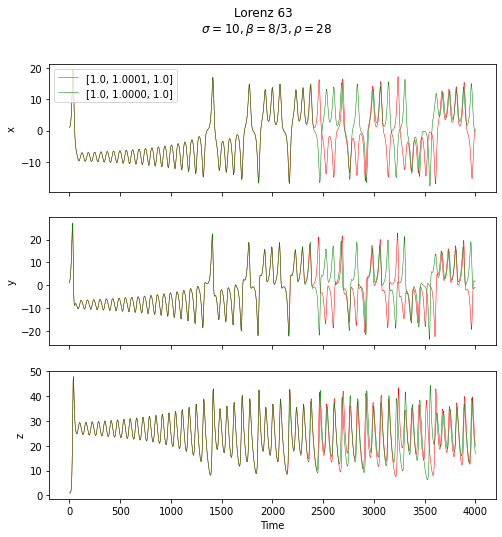

In [20]:
fig, axes = plt.subplots(nrows=3,figsize=(8,8), sharex=True)
ylabels = ["x", "y", "z"]
xlabel = "Time"
for i_plot, ax in enumerate(axes):
    ax.plot(states1[:, i_plot], lw="0.5", c="r", label="[1.0, 1.0001, 1.0]")
    ax.plot(states2[:, i_plot], lw="0.5", c="g", label="[1.0, 1.0000, 1.0]")
    ax.set_ylabel(ylabels[i_plot])
axes[0].legend()
axes[-1].set_xlabel(xlabel)
title = "Lorenz 63" + " \n $\\sigma=10, \\beta=8/3, \\rho=28$"
fig.suptitle(title)

# UNCOMMENT to save the plot
# name_fig = "lorenz_63_xyz_plots"
# filename_fig = path_fig + name_fig + ".png"
# plt.savefig(filename_fig)

plt.show()



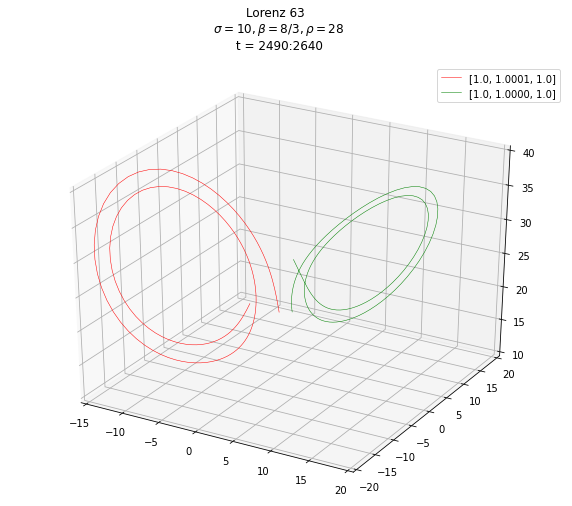

In [21]:
# Phase space: type of plots used to 
fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')
start = 2490
end = 2640
ax.plot(
    states1[start:end, 0], states1[start:end, 1], states1[start:end, 2],
    lw="0.5", c="r",  label="[1.0, 1.0001, 1.0]")
ax.plot(
    states2[start:end, 0], states2[start:end, 1], states2[start:end, 2],
    lw="0.5", c="g",  label="[1.0, 1.0000, 1.0]")
ax.set_xlim3d(-15, 20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(10,40)
ax.legend()
title = "Lorenz 63" + " \n $\\sigma=10, \\beta=8/3, \\rho=28$" + " \n t = " + str(start) + ":" + str(end)
fig.suptitle(title)

# UNCOMMENT to save the plot
# name_fig = "lorenz_63_phase_phase_plot_different_attractors"
# filename_fig = path_fig + name_fig + ".png"
# plt.savefig(filename_fig)
plt.show()



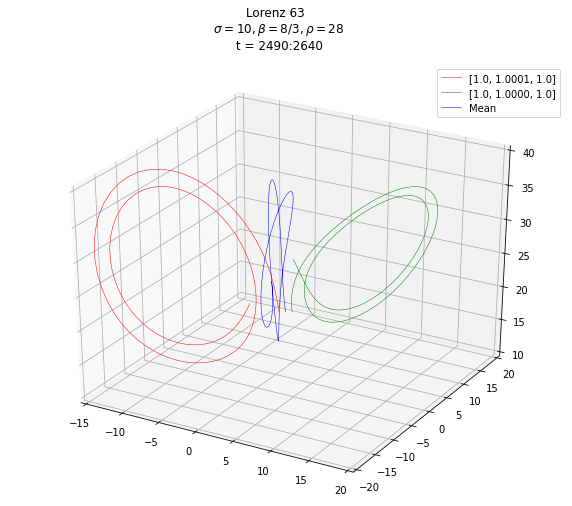

In [22]:
# Phase space: type of plots used to 
fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')
start = 2490
end = 2640
states_mean = (states1+states2)/2
ax.plot(
    states1[start:end, 0], states1[start:end, 1], states1[start:end, 2],
    lw="0.5", c="r",  label="[1.0, 1.0001, 1.0]")
ax.plot(
    states2[start:end, 0], states2[start:end, 1], states2[start:end, 2],
    lw="0.5", c="g",  label="[1.0, 1.0000, 1.0]")
ax.plot(
    states_mean[start:end, 0], states_mean[start:end, 1], states_mean[start:end, 2],
    lw="0.5", c="b",  label="Mean")
ax.set_xlim3d(-15, 20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(10,40)
ax.legend()
title = "Lorenz 63" + " \n $\\sigma=10, \\beta=8/3, \\rho=28$" + " \n t = " + str(start) + ":" + str(end)
fig.suptitle(title)

# UNCOMMENT to save the plot
# name_fig = "lorenz_63_phase_phase_plot_mean_different_attractors"
# filename_fig = path_fig + name_fig + ".png"
# plt.savefig(filename_fig)

plt.show()

